In [1]:
import numpy as np
import pandas as pd
import calendar
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
day = pd.read_csv('/Users/nandinisridharr/Documents/Simple Linear Regression/Bike Sharing Assignment/day.csv')

### Data Exploration

In [4]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


- The <b>dependent variable</b> is <b>cnt</b>.
- There are 730 rows and 16 columns in the dataset.
- There are no NULLs in that dataset.
- By looking at the mean and median for each numerical variable, we can say (for now) that there are no outliers in the data.
- Variable Type:
    - Continuous: temp, atemp, hum, windspeed, casual, registered, cnt
    - Categorical: season, yr, mnth, goliday, weekday, workingday, weathersit (All have numerical values)

### Data Cleaning

<ol>
    <li>instant: This is being dropped as instant is an ID column and therefore is of no use in the analysis. </li>
    <li>dteday: Since it is a date column and month and year information have already been provided, this is being dropped.</li>
    <li>registered and casual: The sum of these columns is the target variable (business knowledge), cnt, and are hence similar to cnt. Since these are variables that are known only after a future event has occurred, they cannot be used for prediction and are being dropped.</li>

In [7]:
day=day.drop(['instant','dteday','registered','casual'],axis=1)

<h2>Data Visualisation:</h2>

### Continuous Variables

#### Univariate Analysis

- The uni_cont function has been defined to plot boxplots for each numerical variable in the list given as input.

In [8]:
def uni_cont(cont_cols,df=day):
    plt.figure(figsize=(15, 15))
    for i in range(0,len(cont_cols)):
        plt.subplot(4,2,i+1)
        #plt.title(cont_cols[i])
        sns.boxplot(df[cont_cols[i]])
plt.show()

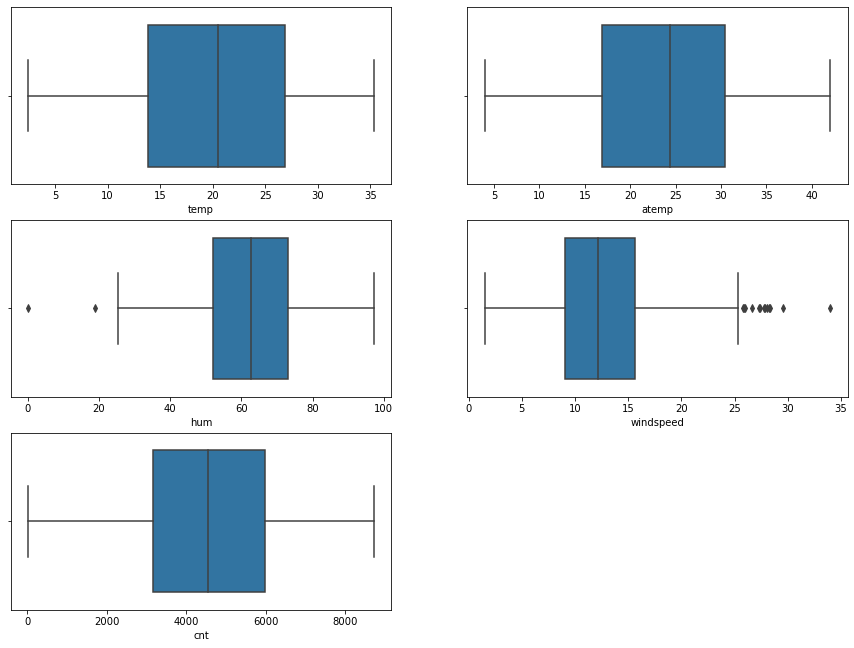

In [9]:
uni_cont(['temp', 'atemp', 'hum', 'windspeed','cnt'])

1. temp, atemp and cnt have no outliers. 
2. Some outliers are present in hum and windspeed variables.

<b>Bivariate Analysis - Pairplot of numerical variables</b>

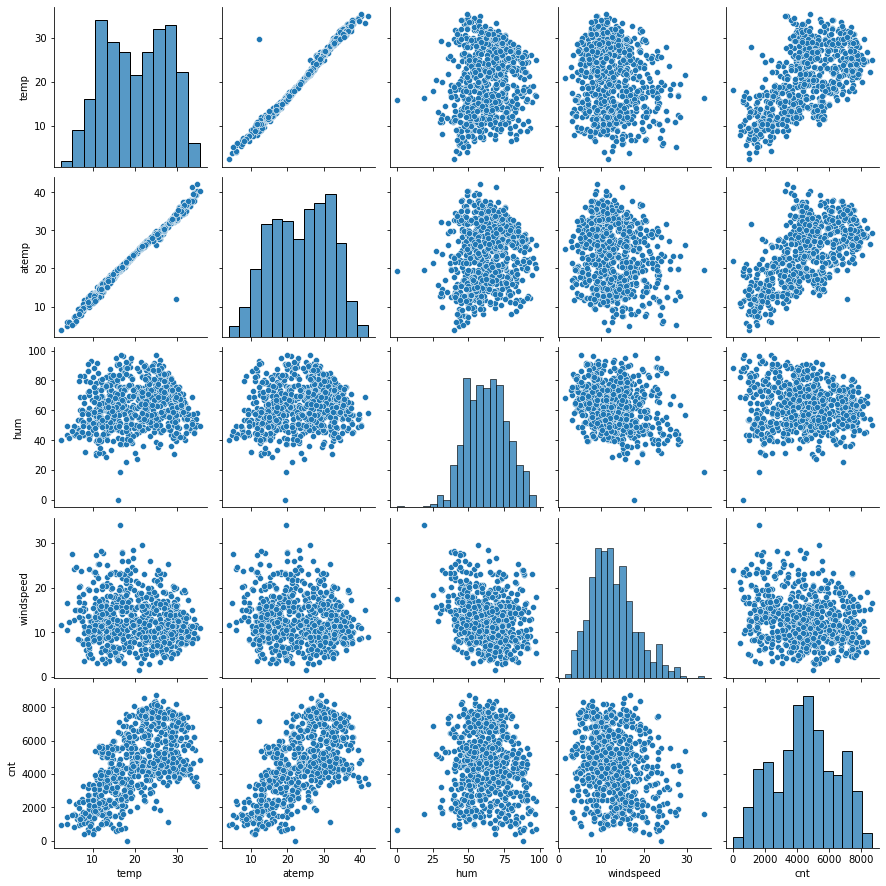

In [10]:
sns.pairplot(day[['temp', 'atemp', 'hum', 'windspeed','cnt']])
plt.show()

In [11]:
day[['cnt','hum']].corr()

,cnt,hum
cnt,1.000000,-0.098543
hum,-0.098543,1.000000


In [12]:
day[['cnt','windspeed']].corr()

,cnt,windspeed
cnt,1.000000,-0.235132
windspeed,-0.235132,1.000000


- Since hum and windspeed have very low correlation with cnt, and the scatterplots show no pattern, these 2 variables can be dropped. This would also make sure the dataset has no outliers.

In [13]:
day=day.drop(['hum','windspeed'],axis=1)

In [14]:
day[['cnt','temp']].corr()

,cnt,temp
cnt,1.000000,0.627044
temp,0.627044,1.000000


In [15]:
day[['cnt','atemp']].corr()

,cnt,atemp
cnt,1.000000,0.630685
atemp,0.630685,1.000000


- As seen in the pairplots, temp and atemp have a strong linear relationship and hence must have high positive correlation. So, one of these may have to be removed to ensure coefficients are reliable (after checking VIF).
- cnt seems to have a linear relationship with temp and atemp.
- The remaining numerial variables seem to have low correlation as they show no discernible patterns.

### Categorical Variables

#### Univariate Analysis:

- The bar_plots function has been defined to show the frequency of categories for each categorical variable given in the list (input list of categorical variables).

In [16]:
def bar_plots(cat_cols,df=day):
    plt.figure(figsize=(20, 16))
    for i in range(0,len(cat_cols)):
        plt.subplot(4,2,i+1)
        plt.title(cat_cols[i])
        df[cat_cols[i]].value_counts().plot.bar()
plt.show()

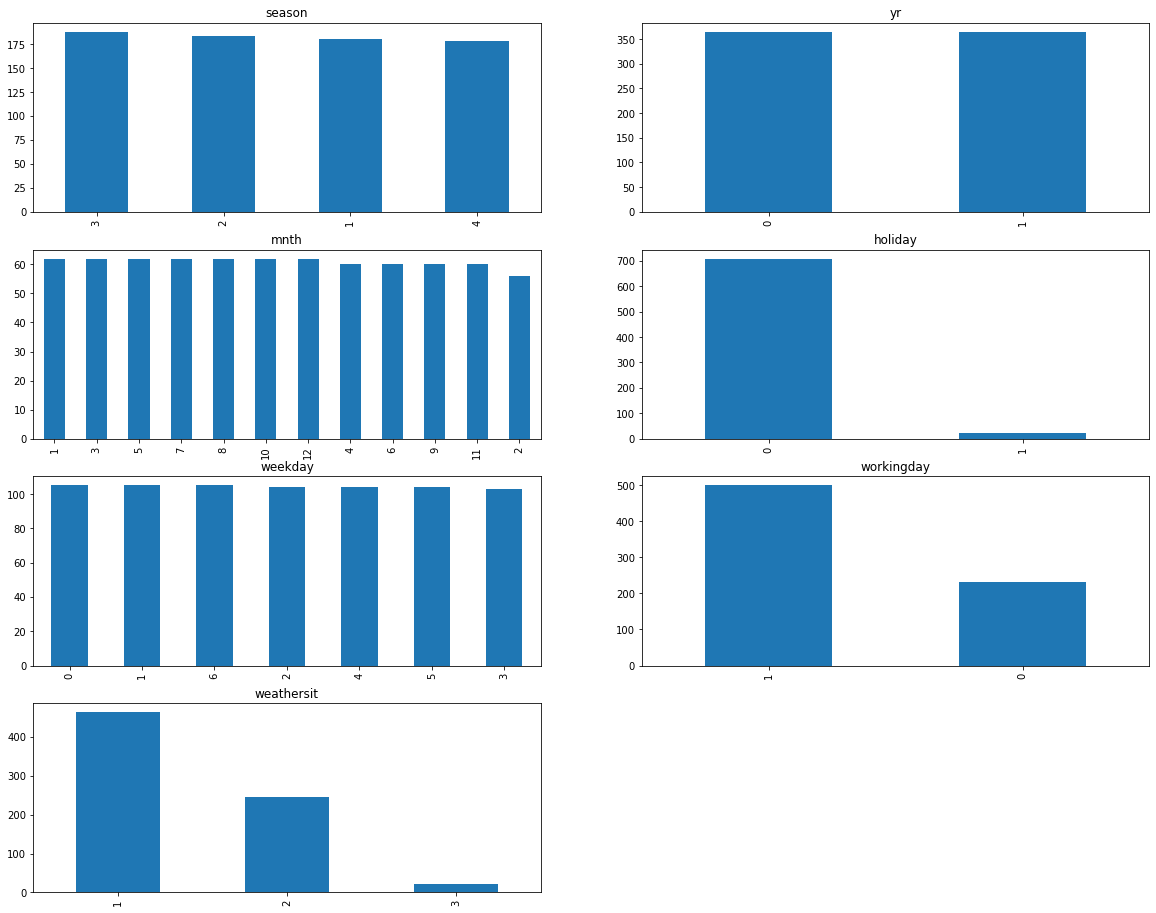

In [17]:
bar_plots(['season', 'yr', 'mnth', 'holiday', 'weekday','workingday', 'weathersit'])

- For the variables season, yr, mnth and weekday, the frequency is more or less equal across the categories.
- For workingday, category 1 has 68% occurence while category 0 has around 32%, which is still okay.
- For weathersit, category 1 has a 63% occurence while category 2 has around 34% and category 3 has only 3%.
- For holiday, category 0 (not a holiday) has 97.12% and category 1 has 2.88% indicating major class imbalance. This variable might need to be removed from the analysis.

#### Bivariate Analysis (wrt dependent variable):

In [18]:
def cat_plots(cat_cols,df=day):
    plt.figure(figsize=(20, 16))
    for i in range(1,len(cat_cols)+1):
        plt.subplot(4,2,i)
        sns.boxplot(x = cat_cols[i-1], y = 'cnt', data = df)
    plt.show()

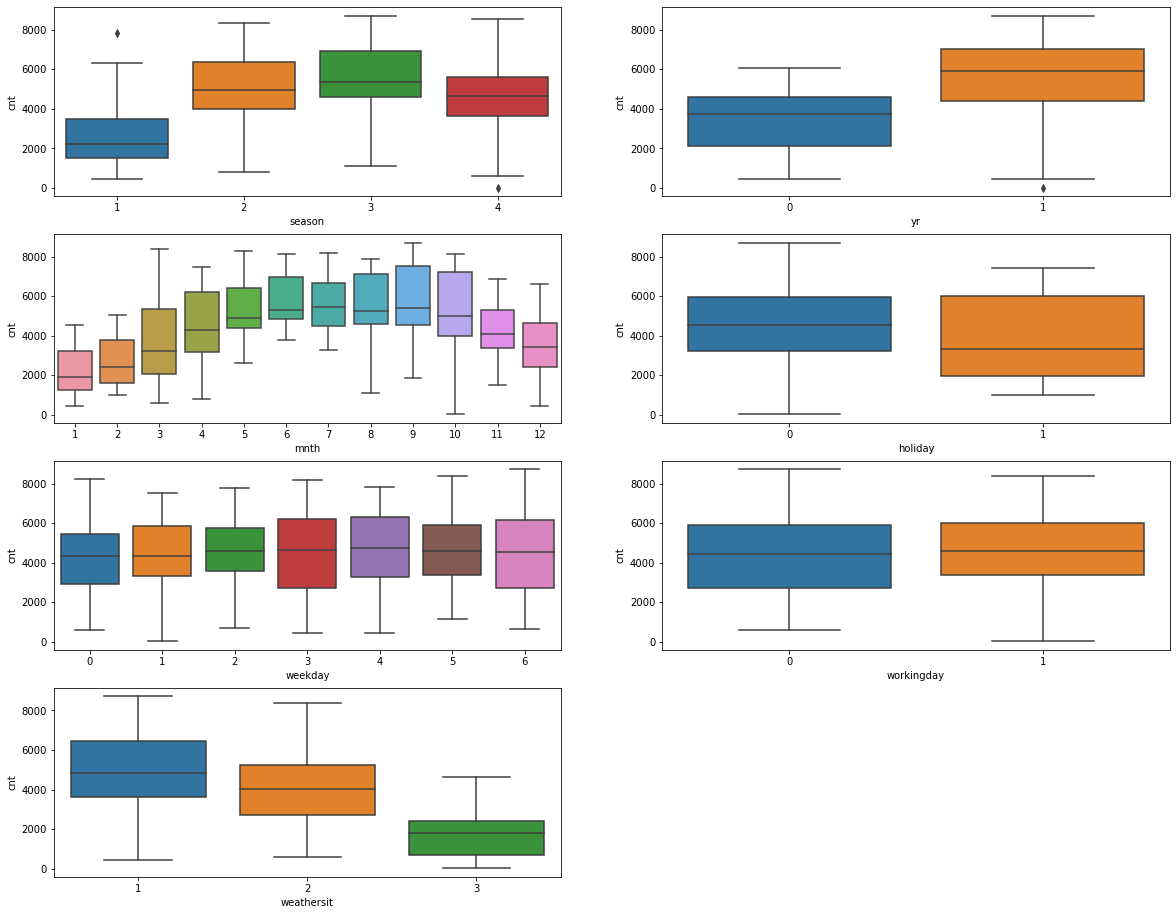

In [19]:
cat_plots(['season', 'yr', 'mnth', 'holiday', 'weekday','workingday', 'weathersit'])

Interpretation of boxplot for each categorical variable w.r.t dependent variable (continuous type), cnt:
<ol> 
    <li>season: Demand is higher during summer (2) and fall (3, <i>highest</i>) seasons.</li>
    <li>yr: The demand was much higher in 2019 than in 2018.</li>
    <li>mnth: Mnth follows the same trend as season, for months April to September (summer and fall), the demand is higher. </li>
    <li>holiday and workingday: For both, the demand is higher on working days/non-holidays as people must be using bicycles as their primary transport.</li>
    <li>Weekday: There is no change in median across the days of the week.</li>
    <li>weathersit: For clear weather, the demand is higher than cloudy/rainy weather</li>
</ol>

#### Multivariate Analysis:

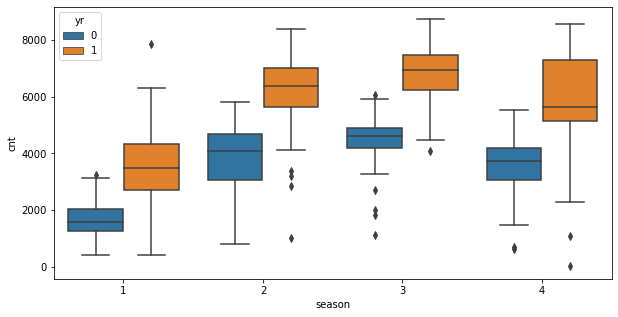

In [20]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'season', y = 'cnt', hue = 'yr', data = day)
plt.show()

- For all seasons, the median demand (cnt) value is much higher in 2019 than in 2018.

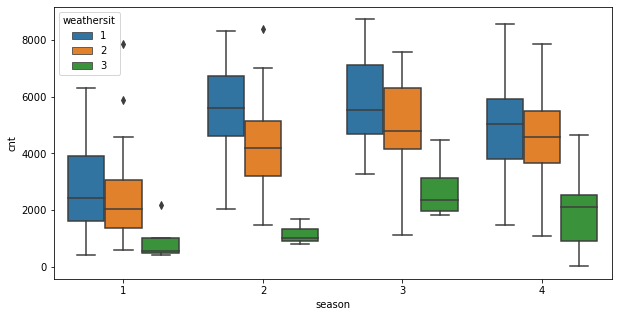

In [21]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'season', y = 'cnt', hue = 'weathersit', data = day)
plt.show()

- Across all seasons, where weather situation is Rain/Snow, the demand is much lower, as expected. 

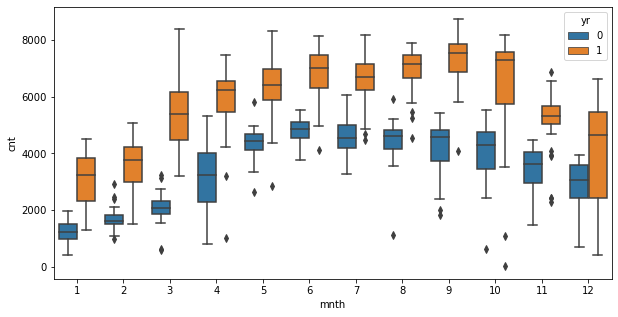

In [22]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'mnth', y = 'cnt', hue = 'yr', data = day)
plt.show()

- Across all months, the demand is higher in 2019 than 2018.
- For both years, the demand is higher during months April-October.

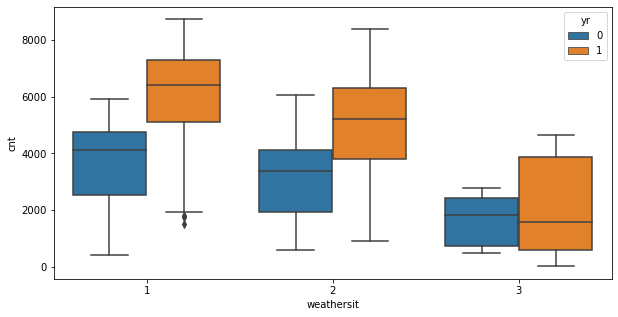

In [23]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'weathersit', y = 'cnt', hue = 'yr', data = day)
plt.show()

- Across weather situations Clear and Cloudy, demand is higer in 2019 then 2018.
- For Rain/Snow weather situation, demand is quite low for both years, 2019 may even be slightly lower than 2018. 

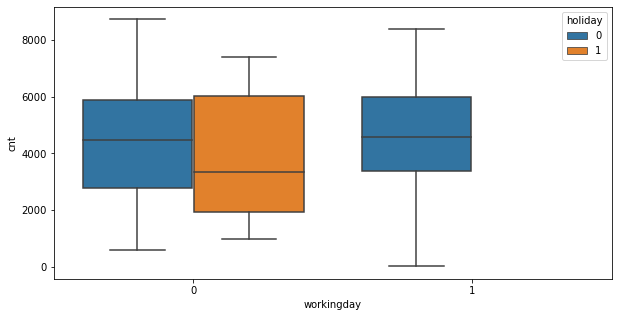

In [24]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'workingday', y = 'cnt', hue = 'holiday', data = day)
plt.show()

- The demand when it is not a holiday is the same across both categories of workingday. 
- But holiday=1 occurs only when it is not a workingday and has lower demand.

### Data Preparation

Note: New metrics are not being derived for this data as the given data is sufficient for prediction and analysis.

#### Converting categorical variables

- The catVar_convert function has been defined to convert the numerical values in the categorical variables to string-like categories. 
- This has been done to later create dummy variables from each categorical one.
- Takes inputs: categorical column to be converted, new list that each category is to be mapped to, dataframe.
- Returns converted categorical variable

In [25]:
def catVar_convert(cat_col,new_list,df=day):
    return df[cat_col].map(dict(zip(np.sort(df[cat_col].unique()),new_list)))

In [26]:
day['season']=catVar_convert('season',['Spring','Summer','Fall','Winter'])

In [27]:
day['weekday']=catVar_convert('weekday',[calendar.day_name[i] for i in list(range(7))])

In [28]:
day['weathersit']=catVar_convert('weathersit',['Clear','Cloudy','Rain/Snow','Storm'])

In [29]:
day['mnth']=catVar_convert('mnth',[calendar.month_name[i] for i in range(1,13)])

- The dummy function has been defined to create a dataframe with the dummy variables given a list of categorical variables.

In [30]:
def dummy(col_list,df=day):
    for i in col_list:
        df = pd.concat([df, pd.get_dummies(df[i], drop_first = True)], axis = 1)
    df=df.drop(col_list,axis=1)
    return df

In [31]:
day=dummy(['season','weekday','mnth','weathersit'])

#### Train-test split

In [32]:
#Setting seed = 0 to makes sure the same random set of rows are chosen each time 
np.random.seed(0)

#Splitting data into train and test (70-30 split is being done)
day_train, day_test = train_test_split(day, train_size = 0.7, test_size = 0.3)

In [33]:
print(day_train.shape)
print(day_test.shape)

(510, 28)
(219, 28)


#### Scaling:

- We are choosing the StandardScaler. 
- As shown in the pairplot and descriptive stats, there are no outliers in the data. MinMaxScaler is mainly used when there are outliers in the data as it scales them. Since there are no outliers, normalization is not needed.

In [34]:
scaler = StandardScaler()

#Only continuous variables need to be standardized
num_vars = ['atemp', 'temp','cnt']

day_train[num_vars] = scaler.fit_transform(day_train[num_vars])

In [35]:
day_train.describe()

,yr,holiday,workingday,temp,atemp,cnt,Spring,Summer,Winter,Monday,...,January,July,June,March,May,November,October,September,Cloudy,Rain/Snow
count,510.000000,510.000000,510.000000,5.100000e+02,5.100000e+02,5.100000e+02,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.500000,0.029412,0.690196,2.829980e-17,3.618021e-16,-8.054559e-17,0.245098,0.258824,0.239216,0.135294,...,0.088235,0.076471,0.086275,0.090196,0.086275,0.080392,0.086275,0.076471,0.335294,0.023529
std,0.500491,0.169124,0.462867,1.000982e+00,1.000982e+00,1.000982e+00,0.430568,0.438419,0.427024,0.342373,...,0.283915,0.266010,0.281045,0.286744,0.281045,0.272166,0.281045,0.266010,0.472557,0.151726
min,0.000000,0.000000,0.000000,-2.121685e+00,-2.245890e+00,-2.370172e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,-8.793582e-01,-8.745433e-01,-6.859098e-01,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,-4.829708e-02,1.442640e-02,3.644738e-02,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,9.050114e-01,8.501464e-01,7.203390e-01,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.997392e+00,2.150984e+00,2.241454e+00,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Data Visualisation for Training Set:

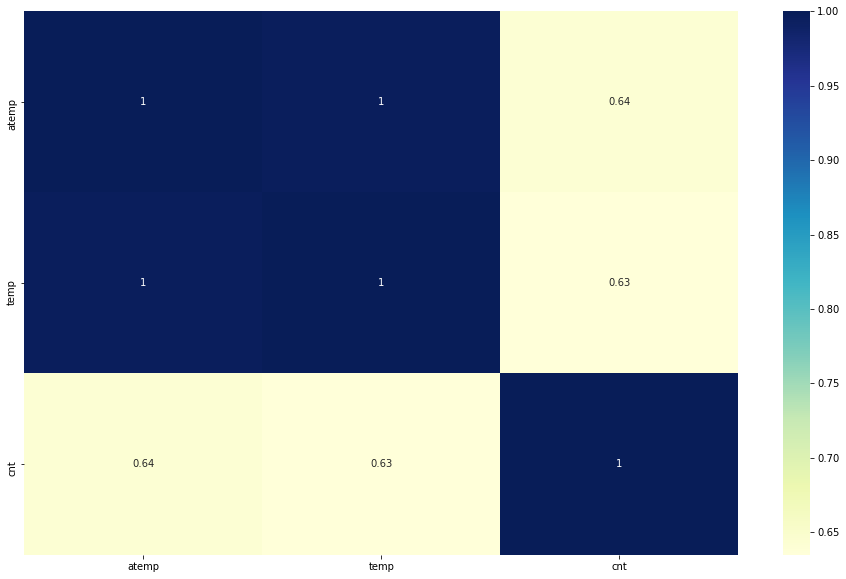

In [36]:
plt.figure(figsize = (16, 10))
sns.heatmap(day_train[num_vars].corr(), annot = True, cmap="YlGnBu")
plt.show()

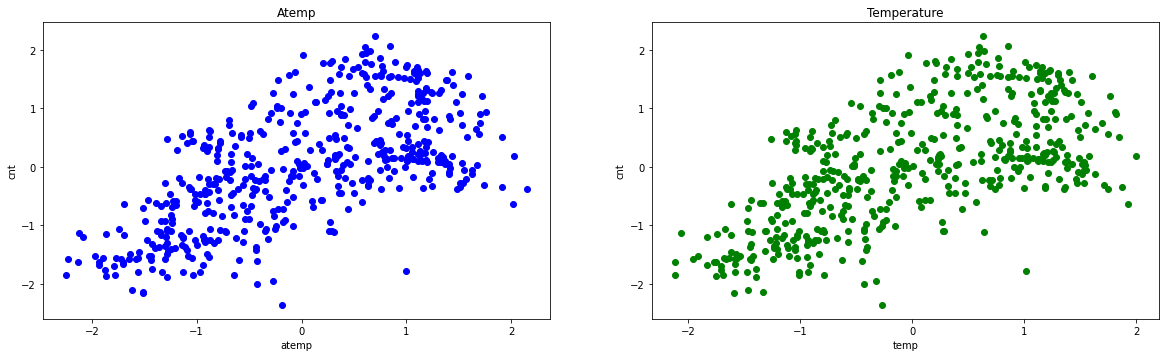

In [37]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
plt.scatter(x = 'atemp', y = 'cnt', data = day_train,color='b')
plt.title('Atemp')
plt.xlabel('atemp')
plt.ylabel('cnt')
plt.subplot(2,2,2)
plt.scatter(x = 'temp', y = 'cnt', data = day_train,color='g')
plt.title('Temperature')
plt.xlabel('temp')
plt.ylabel('cnt')
'''plt.subplot(2,2,3)
plt.scatter(x = 'windspeed', y = 'cnt', data = day_train,color='r')
plt.title('Windspeed')
plt.xlabel('windspeed')
plt.ylabel('cnt')'''
plt.show()

- Both variables show a linear pattern w.r.t to dependant variable, cnt.

In [38]:
# Dividing into X and Y sets for model building
y_train = day_train.pop('cnt')
X_train = day_train

In [39]:
#Fitting the model on the training data
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

### Feature Selection

- A hybrid method of feature selection will be done (automated - RFE + manual (dropping based on pvalue and VIF)).

In [40]:
len(X_train.columns)//2

13

In [41]:
#Applying RFE to the model and fitting on training data
rfe = RFE(lm, len(X_train.columns)//2) #Considering 50% of the predictors
rfe = rfe.fit(X_train, y_train)

In [42]:
#Checking the result of RFE. RFE ranks the variables based on significance (1-most significant)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('Spring', True, 1),
 ('Summer', False, 9),
 ('Winter', True, 1),
 ('Monday', True, 1),
 ('Saturday', False, 11),
 ('Sunday', True, 1),
 ('Thursday', False, 15),
 ('Tuesday', False, 7),
 ('Wednesday', False, 8),
 ('August', False, 14),
 ('December', False, 3),
 ('February', False, 5),
 ('January', False, 4),
 ('July', True, 1),
 ('June', False, 12),
 ('March', False, 10),
 ('May', False, 6),
 ('November', False, 2),
 ('October', False, 13),
 ('September', True, 1),
 ('Cloudy', True, 1),
 ('Rain/Snow', True, 1)]

In [43]:
#After performing RFE, these are the top 13 most significant variables
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'Spring', 'Winter',
       'Monday', 'Sunday', 'July', 'September', 'Cloudy', 'Rain/Snow'],
      dtype='object')

In [44]:
#Keeping only variables suggested by RFE
X_train_rfe = X_train[col]

In [45]:
#Adding constant to training data
X_train_rfe = sm.add_constant(X_train_rfe)

In [46]:
#Fitting OLS regression model to training data
lm = sm.OLS(y_train,X_train_rfe).fit()

In [47]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     177.8
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          4.10e-171
Time:                        23:21:10   Log-Likelihood:                -298.69
No. Observations:                 510   AIC:                             623.4
Df Residuals:                     497   BIC:                             678.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3044      0.041     -7.451      0.0

In [48]:
#Checking insignificant variables (p-value > 0.05) 
lm.pvalues[lm.pvalues>0.05]

workingday    0.344114
temp          0.263870
Sunday        0.257320
dtype: float64

- The variables <b>workingday, temp and atemp</b> have p-value>0.05 and are therefore <b>insignificant</b>.
- The remaining have p-values<0.05 and are significant.

#### Checking VIF

In [49]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,holiday,inf
3,workingday,inf
8,Monday,inf
9,Sunday,inf
4,temp,164.93
5,atemp,162.89
6,Spring,2.61
7,Winter,1.75
10,July,1.28
11,September,1.10


- For workingday, both pvalue and VIF are high and is therefore dropped.

In [50]:
X2_train=X_train_rfe.drop('workingday',axis=1)

In [51]:
vif = pd.DataFrame()
X = X2_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,164.93
4,atemp,162.89
0,const,5.16
5,Spring,2.61
6,Winter,1.75
9,July,1.28
10,September,1.10
7,Monday,1.05
12,Rain/Snow,1.05
8,Sunday,1.04


- For temp, both pvalue and VIF are high and is therefore dropped.

In [52]:
X3_train=X2_train.drop('temp',axis=1)

In [53]:
vif = pd.DataFrame()
X = X3_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,5.14
3,atemp,2.84
4,Spring,2.61
5,Winter,1.66
8,July,1.27
9,September,1.09
6,Monday,1.05
11,Rain/Snow,1.05
7,Sunday,1.04
10,Cloudy,1.04


In [54]:
lr_1= sm.OLS(y_train,X3_train).fit()

In [55]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     193.8
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          5.35e-172
Time:                        23:21:10   Log-Likelihood:                -299.33
No. Observations:                 510   AIC:                             622.7
Df Residuals:                     498   BIC:                             673.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2754      0.044     -6.229      0.0

In [56]:
lr_1.pvalues[lr_1.pvalues>0.05]

Sunday    0.685226
dtype: float64

- Sunday has high pvalue and hence this is being dropped.

In [57]:
X4_train = X3_train.drop('Sunday',axis=1)

In [58]:
vif = pd.DataFrame()
X = X4_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,4.85
3,atemp,2.83
4,Spring,2.61
5,Winter,1.66
7,July,1.27
8,September,1.09
10,Rain/Snow,1.05
9,Cloudy,1.04
1,yr,1.02
2,holiday,1.02


In [59]:
lr_2= sm.OLS(y_train,X4_train).fit()

In [60]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     213.5
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          3.87e-173
Time:                        23:21:10   Log-Likelihood:                -299.41
No. Observations:                 510   AIC:                             620.8
Df Residuals:                     499   BIC:                             667.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2711      0.043     -6.321      0.0

In [61]:
lr_2.pvalues[lr_2.pvalues>0.05]

Series([], dtype: float64)

<b>Interpretations</b>:
1. All pvalues are below 0.05 and VIF<5.
2. The R^2 value is 81.1% and adj. R^2 value is 80.7%, which is good.
3. The F-stat has a value of 213.5 and p(F-stat) is 3.87e-173 which is lesser than 0.05 which implies the R^2 is significant.
4. AIC (620.8) and BIC (667.4) values are also quite high, indicating that more features need not be dropped.

In [62]:
#Final parameters
lr_2.params

const       -0.271082
yr           1.045203
holiday     -0.312047
atemp        0.495156
Spring      -0.518666
Winter       0.205504
Monday      -0.156955
July        -0.294011
September    0.247152
Cloudy      -0.325706
Rain/Snow   -1.289948
dtype: float64

In [63]:
#Predicting dependent variable based on model trained on X4_train
y_train_cnt = lr_2.predict(X4_train)

### Checking the Assumptions of Linear Regression

#### 1. Linear Relationship

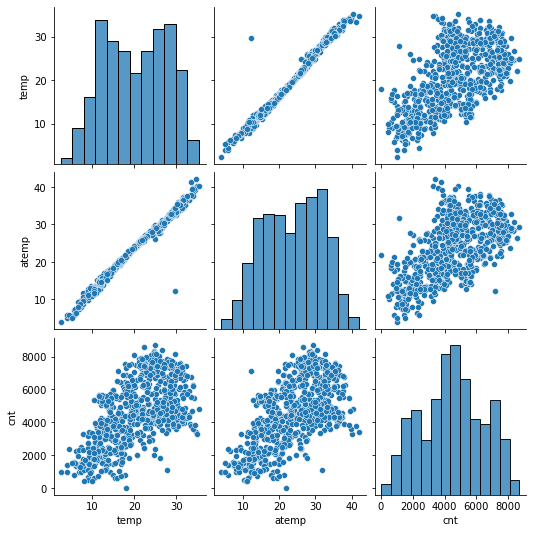

In [64]:
sns.pairplot(day[['temp','atemp','cnt']])
plt.show()

- temp and atemp (X) have linear relationship with cnt (y).

#### 2. Residual Analysis

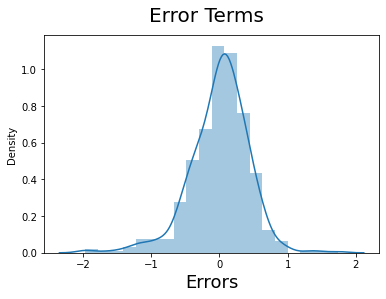

In [65]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)
plt.show()

- Residuals have normal distribution with mean = 0.

#### 3. Homoscedasticity

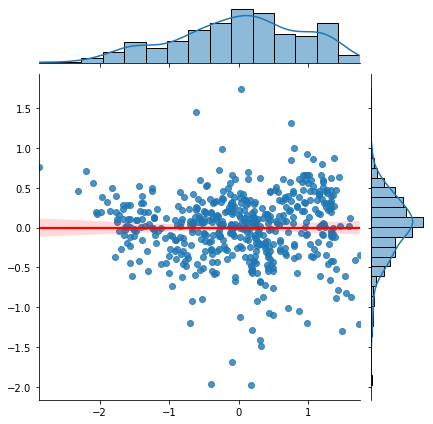

In [66]:
sns.jointplot(x=y_train_cnt,y=y_train - y_train_cnt,kind='reg',joint_kws={'line_kws':{'color':'r'}})
plt.show()

- From the scatter plot (Predicted count vs Residuals), it can be seen that the residuals are homoscedastic in nature. They have no discernable patter.
- The residuals are equal across all values of cnt.

#### 4. Multicollinearity

In [67]:
vif

,Features,VIF
0,const,4.85
3,atemp,2.83
4,Spring,2.61
5,Winter,1.66
7,July,1.27
8,September,1.09
10,Rain/Snow,1.05
9,Cloudy,1.04
1,yr,1.02
2,holiday,1.02


- VIF<5 for all variables indicating there is no multicollinearity.

### Prediction

In [68]:
num_vars = ['temp','atemp', 'cnt']

#Scaling continuous variables of test data
day_test[num_vars] = scaler.fit_transform(day_test[num_vars])

In [69]:
#Splitting test data in X and y sets (independent and dependent variables)
y_test = day_test.pop('cnt')
X_test = day_test

In [70]:
#Adding constant to test data
X_test = sm.add_constant(X_test)

#Dropping columns that are not there in the training set from the test data
X_test=X_test[list(X4_train.columns)]

In [71]:
#Predicting y (cnt) w.r.t test set using model built on training set
y_pred = lr_2.predict(X_test)

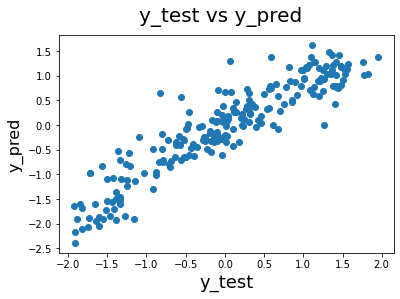

In [72]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)               
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

- The scatterplot shows a linear relationship between ytest and ypred indicating that the model performance is good.

In [73]:
#R^2 value for test data
r2_test = r2_score(y_true=y_test,y_pred=y_pred)

#Adjusted R^2 value for test data
n = X_test.shape[0]  #size of the data
p = X_test.shape[1]  # no. of predictors
adj_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
print('R^2 score for test set: '+str(round(r2_test,2)))
print('Adjusted R^2 score for test set: '+str(round(adj_r2_test,2)))

R^2 score for test set: 0.85
Adjusted R^2 score for test set: 0.84


### Results
- Training R^2: <b>81%</b>
- Adjusted Training R^2: <b>81%</b>
- Test R^2: <b>85%</b>
- Adjusted Test R^2: <b>84%</b>
<br>
- There is only a small difference between adjusted R^2 and R^2 for both training and test datasets.
- There is only a small difference between adjusted R^2 of the training set and adjusted R^2 of the test set, indicating that the model can generalize well.
- Overall model performance is quite good, goodness of fit is 81%, i.e., at least 81% of the data given will be predicted correctly by the model.

### Model:
The equation of the model is given by: <br>
y = mX + c <br>
cnt = (1.045 x <b>yr</b>) + (-0.312 x <b>holiday</b>) + (0.495 x <b>atemp</b>) + (-0.52 x <b>Spring</b>) + (0.205 x <b>Winter</b>) + (-0.15 x <b>Monday</b>) + (-0.294 x <b>July</b>) + (0.247 x <b>September</b>) + (-0.326 x <b>Cloudy</b>) + (-1.29 x <b>Rain/Snow</b>) + (-0.271)

#### Interpretation of Model Equation:
<ol>
    <li><b>Categorical Variables</b>: For the variables yr, holiday, Spring, Winter, Monday, July, September, Cloudy, Rain/Snow, where the variable has value = 0, there is an decrease of 0.271 in cnt with an increase of 1 unit in the variable. But where variable has value = 1, an increase of 1 unit in the variable will result in: <br>
        <ul>
            <li>yr: Increase of (1.045-0.271)</li>
            <li>holiday: Decrease of (-0.312 -0.271)</li>
            <li>Spring: Decrease of (-0.52 -0.271)</li>
            <li>Winter: Decrease of (0.205 -0.271)</li>
            <li>Monday: Decrease of (-0.15 -0.271)</li>
            <li>July: Decrease of (-0.294 -0.271)</li>
            <li>September: Increase of (0.247 -0.271)</li>
            <li>Cloudy: Decrease of (-0.326 -0.271)</li>
            <li>Rain/Snow: Decrease of (-1.29 -0.271)</li>
        </ul>
     <li><b>Continuous Variables</b>: For the variable atemp, one unit increase in atemp will result in (0.495 - 0.271) increase in cnt.</li>
</ol>

# Assignment based subjective questions

### Top 3 variables

- Top 3 variables will be chosen based on the coefficients of the variables, i.e., increasing/decreasing which variables will resulting in a bigger change in cnt.

In [74]:
coefs = pd.DataFrame([lr_2.params.index,lr_2.params.values]).T
coefs.columns=['Variable','Coefficient']
coefs['Absolute Coef. Value'] = abs(coefs['Coefficient'])
coefs.sort_values(by = 'Absolute Coef. Value', ascending=False, inplace=True)
coefs

,Variable,Coefficient,Absolute Coef. Value
10,Rain/Snow,-1.289948,1.289948
1,yr,1.045203,1.045203
4,Spring,-0.518666,0.518666
3,atemp,0.495156,0.495156
9,Cloudy,-0.325706,0.325706
2,holiday,-0.312047,0.312047
7,July,-0.294011,0.294011
0,const,-0.271082,0.271082
8,September,0.247152,0.247152
5,Winter,0.205504,0.205504


Thus, the <b>top 3</b> variables recommended are:
1. <b>Rain/Snow (Category 3 in weathersit)</b>
2. <b>yr </b>
3. <b>Spring (Category 1 in season)</b>

# General Subjective Questions

### Anscombe's Quartet

In [75]:
ans = pd.read_csv('/Users/nandinisridharr/Documents/Simple Linear Regression/Bike Sharing Assignment/anscombe.csv')

In [76]:
ans = ans[['x1','y1','x2','y2','x3','y3','x4','y4']]

In [77]:
ans

,x1,y1,x2,y2,x3,y3,x4,y4
0,10,8.04,10,9.14,10,7.46,8,6.58
1,8,6.95,8,8.14,8,6.77,8,5.76
2,13,7.58,13,8.74,13,12.74,8,7.71
3,9,8.81,9,8.77,9,7.11,8,8.84
4,11,8.33,11,9.26,11,7.81,8,8.47
5,14,9.96,14,8.10,14,8.84,8,7.04
6,6,7.24,6,6.13,6,6.08,8,5.25
7,4,4.26,4,3.10,4,5.39,19,12.50
8,12,10.84,12,9.13,12,8.15,8,5.56
9,7,4.82,7,7.26,7,6.42,8,7.91


In [78]:
set1 = ans[['x1','y1']]
set2 = ans[['x2','y2']]
set3 = ans[['x3','y3']]
set4 = ans[['x4','y4']]

In [79]:
sets=[set1,set2,set3,set4]

In [80]:
stats = pd.DataFrame(['Set1','Set2','Set3','Set4'],columns=['Set'])

In [81]:
stats['Mean(x)']=[sets[i].describe().loc['mean']['x'+str(i+1)] for i in range(0,len(sets))]
stats['StdDev(x)']=[sets[i].describe().loc['std']['x'+str(i+1)] for i in range(0,len(sets))]
stats['Mean(y)']=[sets[i].describe().loc['mean']['y'+str(i+1)] for i in range(0,len(sets))]
stats['StdDev(y)']=[sets[i].describe().loc['std']['y'+str(i+1)] for i in range(0,len(sets))]
stats['Corr(x,y)']=[round(sets[i].corr().loc['x'+str(i+1),'y'+str(i+1)],2) for i in range(0,len(sets))]

In [82]:
stats

,Set,Mean(x),StdDev(x),Mean(y),StdDev(y),"Corr(x,y)"
0,Set1,9.0,3.316625,7.500909,2.031568,0.82
1,Set2,9.0,3.316625,7.500909,2.031657,0.82
2,Set3,9.0,3.316625,7.500000,2.030424,0.82
3,Set4,9.0,3.316625,7.500909,2.030579,0.82


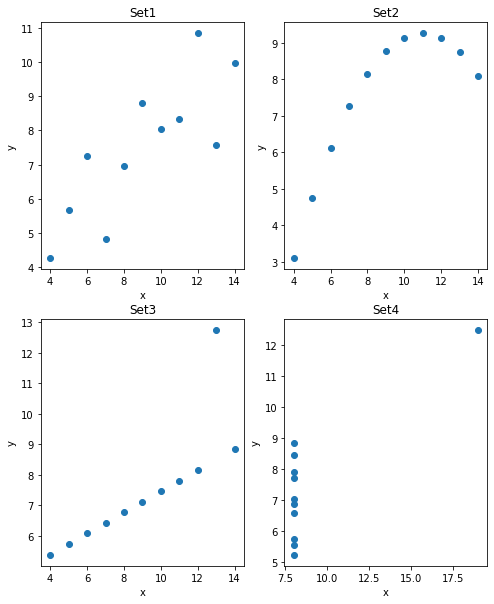

In [83]:
plt.figure(figsize=(8, 10))
for i in range(0,len(sets)):
    plt.subplot(2,2,i+1)
    plt.title(str(stats.loc[i,'Set']))
    plt.scatter(sets[i]['x'+str(i+1)],sets[i]['y'+str(i+1)])
    plt.xlabel('x')
    plt.ylabel('y')
plt.show()